In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class_names = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']



In [8]:
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

cnn_model = build_cnn()
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3364 - loss: 1.7890 - val_accuracy: 0.5228 - val_loss: 1.3326
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5674 - loss: 1.2168 - val_accuracy: 0.6059 - val_loss: 1.1155
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6357 - loss: 1.0306 - val_accuracy: 0.6483 - val_loss: 0.9956
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6763 - loss: 0.9244 - val_accuracy: 0.6692 - val_loss: 0.9490
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6960 - loss: 0.8649 - val_accuracy: 0.6874 - val_loss: 0.9109
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7221 - loss: 0.7935 - val_accuracy: 0.6948 - val_loss: 0.8774
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7387 - loss: 0.7522 - val_accuracy: 0.7057 - val_loss: 0.8569
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7490 - loss: 0.71

In [9]:
resnet_base = tf.keras.applications.ResNet50(weights=None, include_top=False, input_shape=(32,32,3))
resnet_model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))



Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 45ms/step - accuracy: 0.2934 - loss: 2.4113 - val_accuracy: 0.2283 - val_loss: 2.6866
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4008 - loss: 1.8993 - val_accuracy: 0.2461 - val_loss: 7.8926
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.4385 - loss: 1.7779 - val_accuracy: 0.4425 - val_loss: 1.6633
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.4897 - loss: 1.6730 - val_accuracy: 0.2673 - val_loss: 2.3569
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.3784 - loss: 1.8955 - val_accuracy: 0.2342 - val_loss: 2.1075
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.4295 - loss: 1.7248 - val_accuracy: 0.5132 - val_loss: 2.0341
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5324 - loss: 1.3730 - val_accuracy: 0.4933 - val_loss: 1.4001
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.5914 

In [10]:
effnet_base = tf.keras.applications.EfficientNetB0(weights=None, include_top=False, input_shape=(32,32,3))
effnet_model = models.Sequential([
    effnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

effnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
effnet_history = effnet_model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 50ms/step - accuracy: 0.2262 - loss: 2.1999 - val_accuracy: 0.3718 - val_loss: 2.1179
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3937 - loss: 1.6752 - val_accuracy: 0.3844 - val_loss: 1.9173
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.4612 - loss: 1.5119 - val_accuracy: 0.3679 - val_loss: 1.9938
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4530 - loss: 1.5322 - val_accuracy: 0.5077 - val_loss: 1.3707
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4819 - loss: 1.4909 - val_accuracy: 0.5161 - val_loss: 1.4048
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5410 - loss: 1.3023 - val_accuracy: 0.5792 - val_loss: 1.1558
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5815 - loss: 1.1782 - val_accuracy: 0.6068 - val_loss: 1.1269
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6188 

In [11]:
cnn_acc = cnn_model.evaluate(x_test, y_test, verbose=0)[1]
resnet_acc = resnet_model.evaluate(x_test, y_test, verbose=0)[1]
effnet_acc = effnet_model.evaluate(x_test, y_test, verbose=0)[1]

print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"ResNet Accuracy: {resnet_acc:.4f}")
print(f"EfficientNet Accuracy: {effnet_acc:.4f}")



CNN Accuracy: 0.7052
ResNet Accuracy: 0.7177
EfficientNet Accuracy: 0.7257


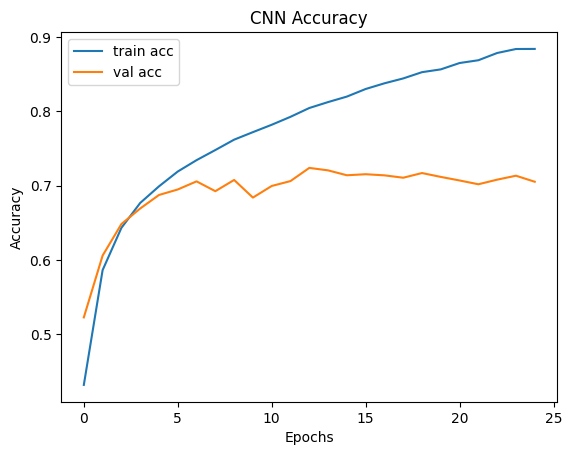

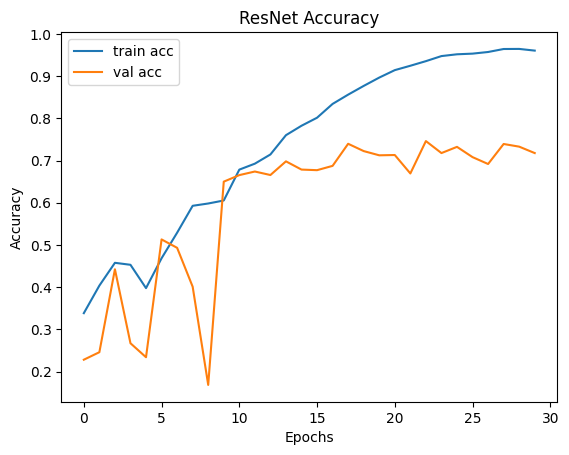

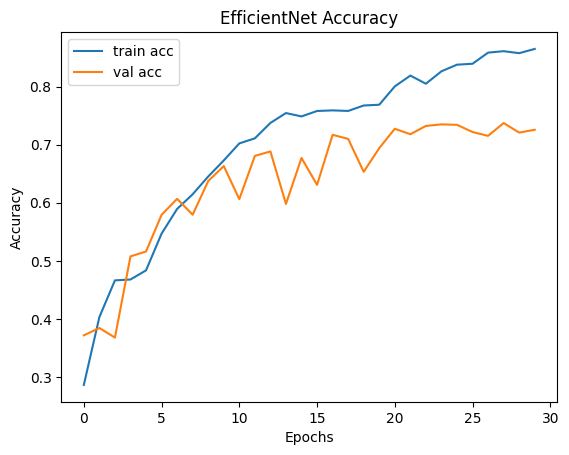

In [12]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(cnn_history, 'CNN Accuracy')
plot_history(resnet_history, 'ResNet Accuracy')
plot_history(effnet_history, 'EfficientNet Accuracy')
